Los objetivos de este análisis son:
* Identificar el tipo de dato de todas la entidades en la tabla.
* Estadísticas generales (conteo de registros, mínimo, máximo, datos nulos, etc.)
* Conocer la longitud máxima de cadena para cada entidad.
* Identificar y corregir problemas en los datos.
* Identificar llaves primarias y foráneas.

In [2]:
# Librerías
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

* Se encontró el mensaje: "Error tokenizing data. C error: Expected 29 fields in line 244, saw 30" al leer los datos como un DataFrame para CUSTOMERt, PRODUCTSt y PROMOTION. Esto se debe a que hay filas con mayor cantidad de datos que los encabezados de columna.
* Al revisar los datos en CSV, existen descripciones que emplean comas(,). Se procedió a reemplazar los casos ", " por ("; ").
* Adicionalmente, PRODUCTSt en la línea en el Product Key 477 hacía uso de una coma para indicar decimales y se reemplazó "0," por "0.".

In [3]:
# Lectura de datos
myPath = '/workspaces/Database-project/data/'
# Principales
sales = pd.read_csv(myPath + 'aligned/SALES.csv', encoding='latin-1')
cust = pd.read_csv(myPath + 'aligned/Customer.csv', encoding='latin-1')
prod = pd.read_csv(myPath + 'aligned/Product.csv', encoding='latin-1')
# Complementarios
prom = pd.read_csv(myPath + 'aligned/Promotion.csv', encoding='latin-1')
curr = pd.read_csv(myPath + 'aligned/CURRENCY.csv', encoding='latin-1')

# Funciones
def my_summary(df):
    count_values = df.count().to_frame('count')
    distinct_values = df.nunique().to_frame('distinct')
    min_col_len = df.round(0).astype(str).apply(lambda s: s.str.len()).max().to_frame('min_length')
    max_col_len = df.round(0).astype(str).apply(lambda s: s.str.len()).max().to_frame('max_length')
    num_types = df.dtypes.to_frame('dtypes')
    min_max_value = pd.concat([df.min().to_frame('min_value'), df.max().to_frame('max_value')], axis=1)
    my_summary = pd.concat([count_values, distinct_values, min_col_len, max_col_len, num_types, min_max_value], axis=1)
    return my_summary


## 1. Sales
Preguntas planteadas al tener una visualización general:
1. ¿Son útiles las columnas OrderDateKey, ShipDateKey y CustomerKey?
2. ¿Son nulos todos los datos en CarrierTrackingNumber y CustomerPONumber?
3. ¿SalesOrderNumber es una llave primaria?
4. ¿Existen registros nulos en alguna otra columna?
5. ¿SalesTerritoryKey es llave primaria de otra tabla?

In [4]:
# sales.info() # 60398 entries, 26 columns
# sales.drop_duplicates().info() #60398 entries, 26 columns
sales.head(3)

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,310,20101229,20110110,20110105,21768,1,19,6,SO43697,1,...,2171.2942,2171.2942,3578.27,286.2616,89.4568,NaN,NaN,2010-12-29 00:00:00,2011-01-10 00:00:00,2011-01-05 00:00:00
1,346,20101229,20110110,20110105,28389,1,39,7,SO43698,1,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,2010-12-29 00:00:00,2011-01-10 00:00:00,2011-01-05 00:00:00
2,346,20101229,20110110,20110105,25863,1,100,1,SO43699,1,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,2010-12-29 00:00:00,2011-01-10 00:00:00,2011-01-05 00:00:00


In [4]:
my_summary(sales)

,count,distinct,min_length,max_length,dtypes,min_value,max_value
ProductKey,60398,158,3,3,int64,214,606
OrderDateKey,60398,1124,8,8,int64,20101229,20140128
DueDateKey,60398,1124,8,8,int64,20110110,20140209
ShipDateKey,60398,1124,8,8,int64,20110105,20140204
CustomerKey,60398,18484,5,5,int64,11000,29483
PromotionKey,60398,4,2,2,int64,1,14
CurrencyKey,60398,6,3,3,int64,6,100
SalesTerritoryKey,60398,10,2,2,int64,1,10
SalesOrderNumber,60398,27659,7,7,object,SO43697,SO75123
SalesOrderLineNumber,60398,8,1,1,int64,1,8


### Modificaciones en la tabla sales
* Se eliminan las columnas sin datos (CarrierTrackingNumber, CustomerPONumber) y las "llaves" de fechas (YYYYMMDD).
* Se remueven las columnas para las que se repite un mismo valor en todas las filas.
    * RevisionNumber y OrderQuantity tienen 1 como su único valor.
    * UnitPriceDiscountPct y DiscountAmount tienen 0 como su único valor.

In [5]:
sales[['RevisionNumber', 'OrderQuantity', \
        'UnitPriceDiscountPct', 'DiscountAmount', 'CarrierTrackingNumber', 'CustomerPONumber']].describe().T

,count,mean,std,min,25%,50%,75%,max
RevisionNumber,60398.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
OrderQuantity,60398.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
UnitPriceDiscountPct,60398.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DiscountAmount,60398.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CarrierTrackingNumber,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerPONumber,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
sales_cp = sales.copy()
# Se verifica que ninguna fecha tenga problemasde formato.
sales_cp['OrderDate'] = pd.to_datetime(sales_cp['OrderDate'], format='%Y-%m-%d %H:%M:%S')
sales_cp['DueDate'] = pd.to_datetime(sales_cp['DueDate'], format='%Y-%m-%d %H:%M:%S')
sales_cp['ShipDate'] = pd.to_datetime(sales_cp['ShipDate'], format='%Y-%m-%d %H:%M:%S')
# Se eliminan las columnas sin datos y las llaves de fechas.
sales_cp.drop(columns=['OrderDateKey', 'DueDateKey', 'ShipDateKey', \
        'SalesTerritoryKey', 'RevisionNumber', 'OrderQuantity', \
        'UnitPriceDiscountPct', 'DiscountAmount', 'CarrierTrackingNumber', \
        'CustomerPONumber'], inplace = True)
# Guardamos los datos limpios.
sales_cp.to_csv(myPath+'cleaned/SALES_clean.csv', encoding='latin-1', index=False)
# sales_cp.describe().T

La descripción de los datos nos da indicios sobre nuestros datos categóricos:
* PromotionKey
* CurrencyKey
* SalesTerritoryKey
* SalesOrderLineNumber

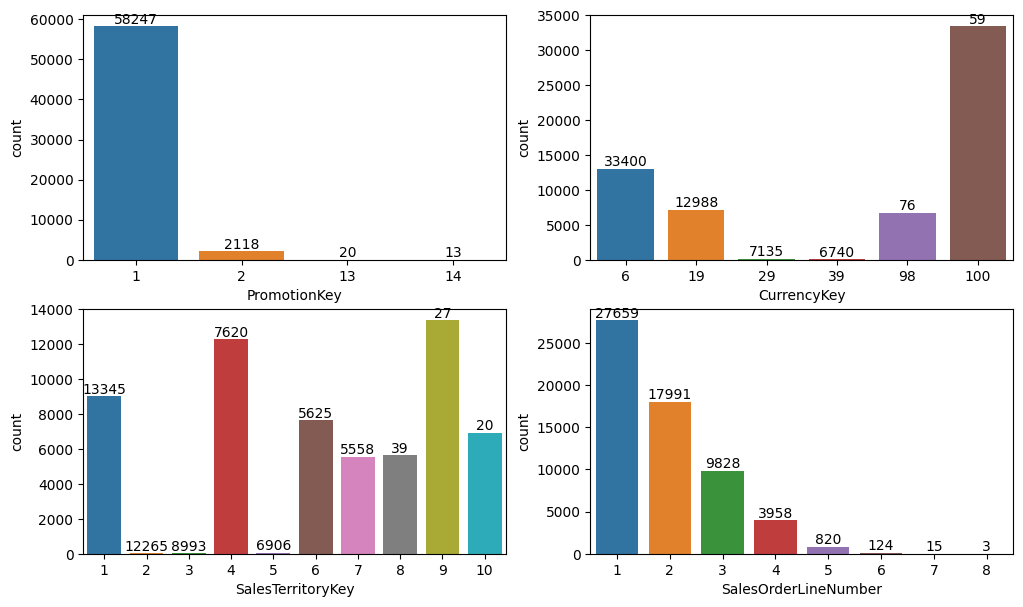

In [7]:
sales = pd.read_csv(myPath + 'cleaned/SALES_clean.csv', encoding='latin-1', \
    parse_dates=['OrderDate', 'DueDate', 'ShipDate'], infer_datetime_format=True)
df = sales
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
ax = sns.countplot(data = df, ax=axes[0,0], x='PromotionKey')
abs_values = df['PromotionKey'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=abs_values)

ax = sns.countplot(data = df, ax=axes[0,1], x='CurrencyKey')
abs_values = df['CurrencyKey'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=abs_values)

ax = sns.countplot(data= df, ax=axes[1,0], x='SalesTerritoryKey')
abs_values = df['SalesTerritoryKey'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=abs_values)

ax = sns.countplot(data=df, ax=axes[1,1], x=df['SalesOrderLineNumber'])
abs_values = df['SalesOrderLineNumber'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=abs_values);

* Finalmente, concluimos con 6 columnas menos.
* No se requiren normalizaciones.
* Obtenemos el tipo de dato y número de caracteres de las columnas.
* Se identifican 5 llaves que contienen "Key" en su nombre.
    * ProductKey
    * CustomerKey
    * PromotionKey
    * CurrencyKey
    * SalesTerritoryKey

In [8]:
my_summary(sales_cp)

,count,distinct,min_length,max_length,dtypes,min_value,max_value
ProductKey,60398,158,3,3,int64,214,606
OrderDateKey,60398,1124,8,8,int64,20101229,20140128
DueDateKey,60398,1124,8,8,int64,20110110,20140209
ShipDateKey,60398,1124,8,8,int64,20110105,20140204
CustomerKey,60398,18484,5,5,int64,11000,29483
PromotionKey,60398,4,2,2,int64,1,14
CurrencyKey,60398,6,3,3,int64,6,100
SalesTerritoryKey,60398,10,2,2,int64,1,10
SalesOrderNumber,60398,27659,7,7,object,SO43697,SO75123
SalesOrderLineNumber,60398,8,1,1,int64,1,8


## 2. CUSTOMERS
Preguntas de la visualización general:
* ¿Es de utilidad una llave alterna de CustomerKey?
* ¿Qué información aporta NameStyle (solo existen valores falsos y nulos)?
* ¿Los primeros dígitos en AddressLine1 son el código postal?
* ¿Los números de teléfono con más de 10 dígitos añadieron al principio LADA?
* ¿CommuteDistance es la distancia de los clientes al punto de venta?

In [11]:
# cust.info() #18485 entradas, 29 columnas
cust.head(4)

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance
0,11000,26,AW00011000,NaN,Jon,V,Yang,False,1971-10-06,M,...,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,2011-01-19,1-2 Miles
1,11001,37,AW00011001,NaN,Eugene,L,Huang,False,1976-05-10,S,...,Professional,Profesional,Cadre,0,1,2243 W St.,NaN,1 (11) 500 555-0110,2011-01-15,0-1 Miles
2,11002,31,AW00011002,NaN,Ruben,NaN,Torres,False,1971-02-09,M,...,Professional,Profesional,Cadre,1,1,5844 Linden Land,NaN,1 (11) 500 555-0184,2011-01-07,2-5 Miles
3,11003,11,AW00011003,NaN,Christy,NaN,Zhu,False,1973-08-14,S,...,Professional,Profesional,Cadre,0,1,1825 Village Pl.,NaN,1 (11) 500 555-0162,2010-12-29,5-10 Miles


In [12]:
my_summary(cust)

/tmp/ipykernel_24356/3238006593.py:18: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  min_max_value = pd.concat([df.min().to_frame('min_value'), df.max().to_frame('max_value')], axis=1)
/tmp/ipykernel_24356/3238006593.py:18: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  min_max_value = pd.concat([df.min().to_frame('min_value'), df.max().to_frame('max_value')], axis=1)


,count,distinct,min_length,max_length,dtypes,min_value,max_value
CustomerKey,18484,18484,5,5,int64,11000,29483
GeographyKey,18484,336,3,3,int64,2,654
CustomerAlternateKey,18484,18484,10,10,object,AW00011000,AW00029483
Title,101,5,4,4,object,NaN,NaN
FirstName,18484,670,11,11,object,Aaron,Zoe
MiddleName,10654,44,10,10,object,NaN,NaN
LastName,18484,375,16,16,object,Adams,Zukowski
NameStyle,18484,1,5,5,bool,False,False
BirthDate,18484,6139,10,10,object,1916-02-10,1986-06-25
MaritalStatus,18484,2,1,1,object,M,S


## Modificaciones en la tabla customers

* El 1 (11) en la columna Phone, parece ser información repetitiva. El formato de número deberá ser forzosamente XXX-XXX-XXXX, o bien 10 dígitos seguidos.
* La palabra "Miles" en la columna CommuteDistance es información redundante. Se debe eliminar. Además, contiene información categórica (0-1,2-5...), que puede ser mapeada con números para disminuir el volumen de datos.
* BirthDate y DateFirstPurchase deben guardarse en formato de fecha.
* Eliminación de la columna NameStyle, que contiene un solo registro repetido en todas las columnas.
* Eliminación de las columnas: Title, que contiene colamente 101 registros, Suffix, con 3 registros y AddressLine2, con 312. Considerando que el total de registros es de 18485, estas columnas tienen un porcentaje de datos del 0.54, 0.016 y 1.7%, respectivamente, por lo que las columnas no generarán conocimientos de interés y se eliminarán.

In [8]:
cust_cp = cust.copy()
cust_cp['BirthDate'] = pd.to_datetime(cust_cp['BirthDate'], format='%Y-%m-%d')
cust_cp['DateFirstPurchase'] = pd.to_datetime(cust_cp['DateFirstPurchase'], format='%Y-%m-%d')
# Se eliminan las columnas sin datos y los nombres en otros idiomas.
cust_cp.drop(columns=['GeographyKey', 'CustomerAlternateKey', 'Title', 'NameStyle', \
    'Suffix', 'SpanishEducation', 'FrenchEducation','SpanishOccupation', 'FrenchOccupation',\
          'AddressLine2'], inplace = True)
cust_cp['Phone'] = cust_cp['Phone'].replace({' ':'', '-': ''}, regex=True).str[-10:].astype(int)
# cust_cp['CommuteDistance'] = cust_cp['CommuteDistance'].\
# replace({' ':'', 'Miles': '', '10\+':'10-'}, regex=True)
# cust_cp[['CommuteDistanceMin','CommuteDistanceMax']] = cust_cp['CommuteDistance'].str.split("-", expand = True)
cust_cp[['CommuteDistanceMin','CommuteDistanceMax']] = cust_cp['CommuteDistance'].\
replace({' ':'', 'Miles': '', '10\+':'10-'}, regex=True).str.split("-", expand = True)
cust_cp['CommuteDistanceMin'] = pd.to_numeric(cust_cp['CommuteDistanceMin'], errors='coerce', downcast='integer')
cust_cp['CommuteDistanceMax'] = pd.to_numeric(cust_cp['CommuteDistanceMax'], errors='coerce', downcast='integer')
cust_cp.drop(columns='CommuteDistance', inplace = True)
# Exportamos los datos
cust_cp.to_csv(myPath+'cleaned/CUSTOMERS_clean.csv', encoding='latin-1', index=False)
cust_cp.head()

,CustomerKey,FirstName,MiddleName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,Phone,DateFirstPurchase,CommuteDistanceMin,CommuteDistanceMax
0,11000,Jon,V,Yang,1971-10-06,M,M,jon24@adventure-works.com,90000,2,0,Bachelors,Professional,1,0,3761 N. 14th St,5005550162,2011-01-19,1,2.0
1,11001,Eugene,L,Huang,1976-05-10,S,M,eugene10@adventure-works.com,60000,3,3,Bachelors,Professional,0,1,2243 W St.,5005550110,2011-01-15,0,1.0
2,11002,Ruben,NaN,Torres,1971-02-09,M,M,ruben35@adventure-works.com,60000,3,3,Bachelors,Professional,1,1,5844 Linden Land,5005550184,2011-01-07,2,5.0
3,11003,Christy,NaN,Zhu,1973-08-14,S,F,christy12@adventure-works.com,70000,0,0,Bachelors,Professional,0,1,1825 Village Pl.,5005550162,2010-12-29,5,10.0
4,11004,Elizabeth,NaN,Johnson,1979-08-05,S,F,elizabeth5@adventure-works.com,80000,5,5,Bachelors,Professional,1,4,7553 Harness Circle,5005550131,2011-01-23,1,2.0


In [41]:
my_summary(cust_cp)

/tmp/ipykernel_2188/3238006593.py:18: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  min_max_value = pd.concat([df.min().to_frame('min_value'), df.max().to_frame('max_value')], axis=1)
/tmp/ipykernel_2188/3238006593.py:18: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  min_max_value = pd.concat([df.min().to_frame('min_value'), df.max().to_frame('max_value')], axis=1)


,count,distinct,min_length,max_length,dtypes,min_value,max_value
CustomerKey,18484,18484,5,5,int64,11000,29483
GeographyKey,18484,336,3,3,int64,2,654
CustomerAlternateKey,18484,18484,10,10,object,AW00011000,AW00029483
FirstName,18484,670,11,11,object,Aaron,Zoe
MiddleName,10654,44,10,10,object,NaN,NaN
LastName,18484,375,16,16,object,Adams,Zukowski
BirthDate,18484,6139,10,10,datetime64[ns],1916-02-10 00:00:00,1986-06-25 00:00:00
MaritalStatus,18484,2,1,1,object,M,S
Gender,18484,2,1,1,object,F,M
EmailAddress,18484,18484,33,33,object,aaron10@adventure-works.com,zoe9@adventure-works.com


## 3. PRODUCTS

In [ ]:
prod.isnull().sum()

## 4. Promotion 
* Se eliminan las columnas SpanishPromotionName, FrenchPromotionName, SpanishPromotionType, FrenchPromotionType, SpanishPromotionCategory, FrenchPromotionCategory
* Se corrige el formato de fecha de las columnas StartDate y EndDate.

In [12]:
#Se verifican y cambian los formatos de las columnas StartDate y EndDate.
prom_cp = prom.copy()
prom_cp['StartDate'] = pd.to_datetime(prom_cp['StartDate'], format='%Y-%m-%d %H:%M:%S')
prom_cp['EndDate'] = pd.to_datetime(prom_cp['EndDate'], format='%Y-%m-%d %H:%M:%S')

#Se eliminan las columnas.
prom_cp.drop(columns=['SpanishPromotionName', 'FrenchPromotionName', \
    'SpanishPromotionType', 'FrenchPromotionType', 'SpanishPromotionCategory', \
        'FrenchPromotionCategory'], inplace = True)

# Guardamos los dios.atos limp
prom_cp.to_csv(myPath+'cleaned/PROMOTIONS_clean.csv', encoding='latin-1', \
    index=False, date_format='%Y-%m-%d')

In [ ]:
my_summary(prom)

## 5. Currency
* Datos sin modificaciones 

In [ ]:
# Guardamos los datos limpios

my_summary(curr)
curr.to_csv(myPath+'cleaned/CURRENCYurrency_clean.csv', index=False)


